1-1. 탐색적 데이터 분석 수행(시각화포함)

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("data1.csv")
data.head()

C:\Users\taeeu\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


모든 변수는 수치형으로 이루어져있음

In [4]:
data_outcome=data['Outcome'].value_counts()
data_outcome

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

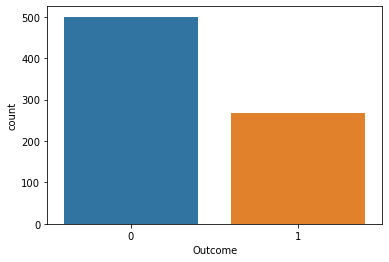

In [5]:
import seaborn as sns
sns.countplot(x='Outcome', data=data)

종속변수는 0과 1로 구성된 수치형 변수이기 때문에 분류 모델을 생성해야한다.

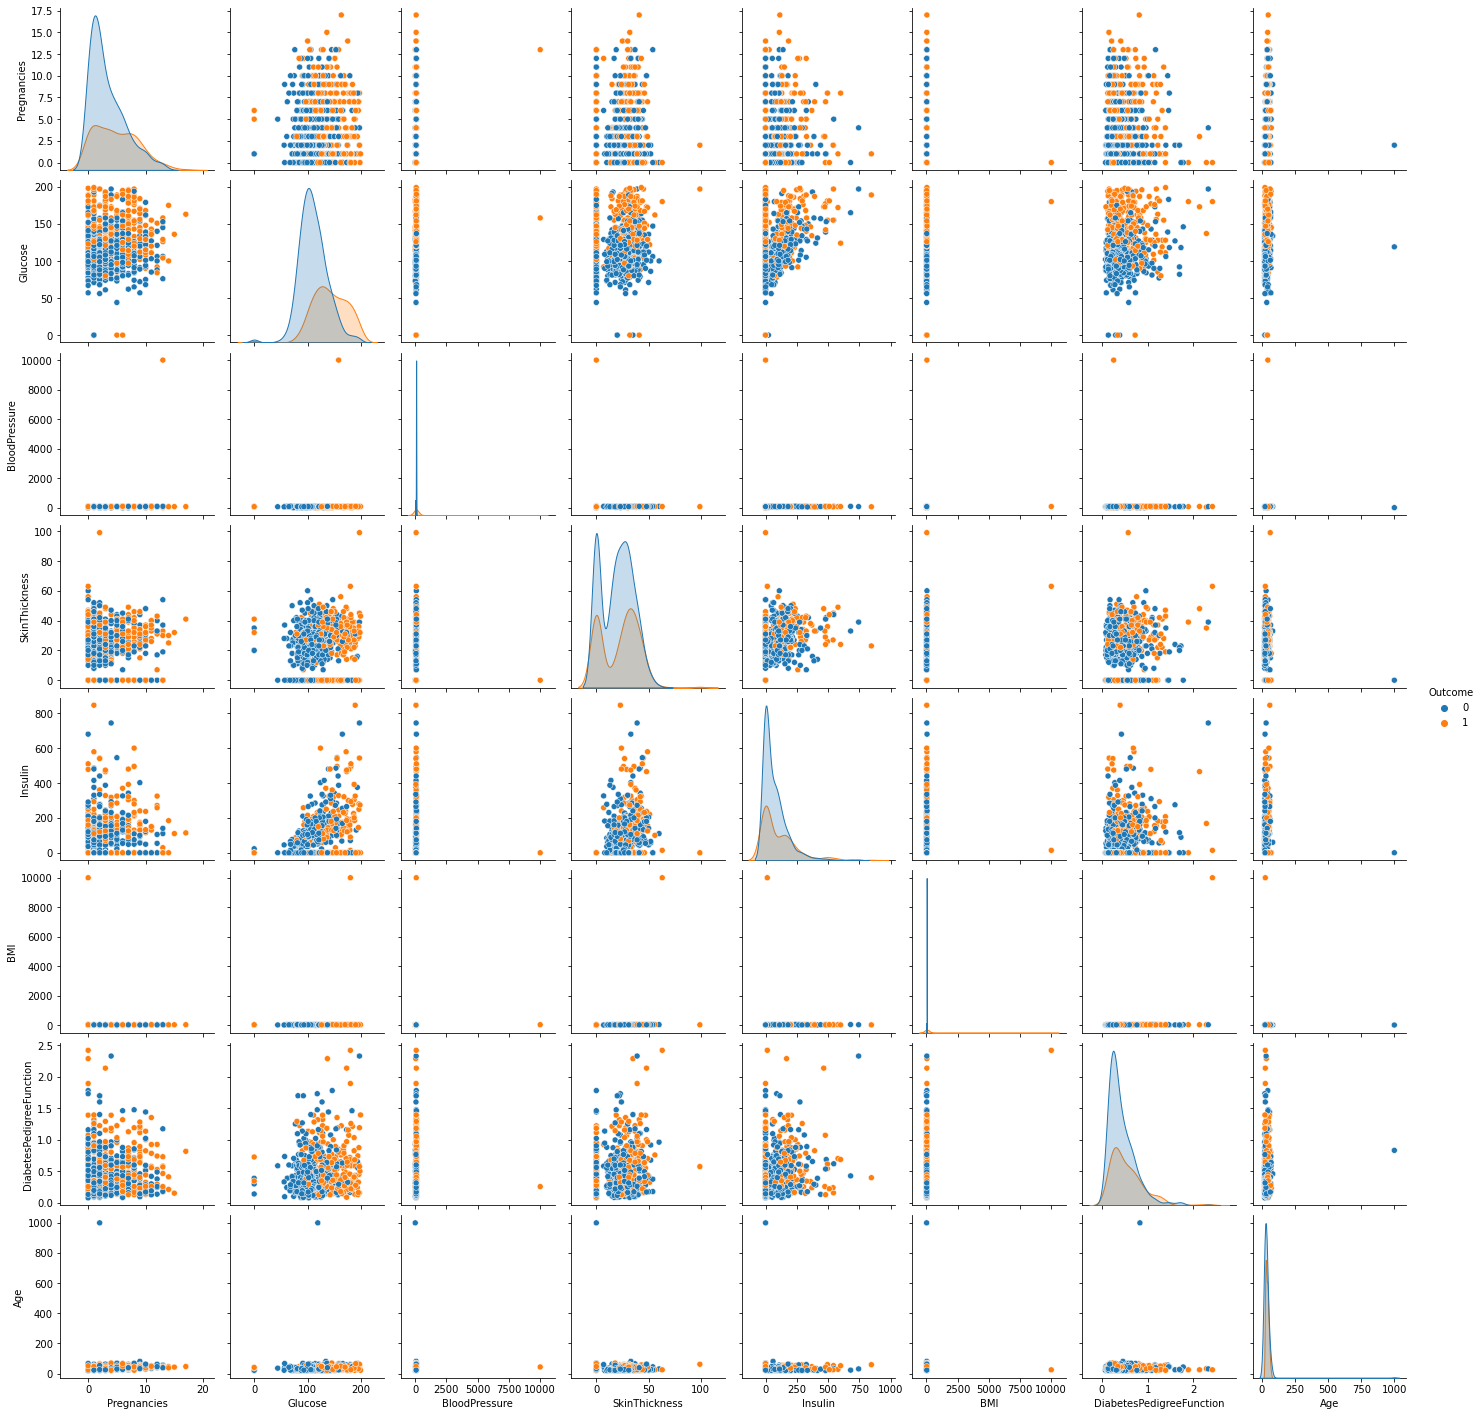

In [7]:
#산점도 행렬
import matplotlib.pyplot as plt
sns.pairplot(data, diag_kind='auto', hue='Outcome')
plt.show()

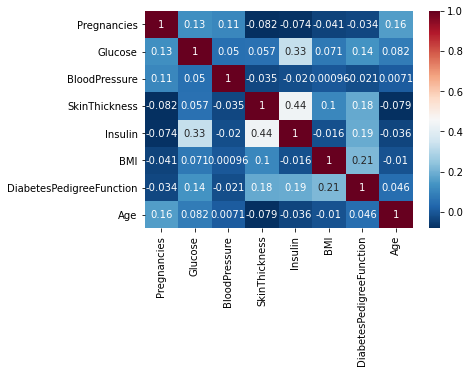

In [8]:
#상관계수 행렬 그래프
data_corr=data.drop(columns='Outcome').corr(method='pearson')
sns.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=data_corr.columns, cmap='RdBu_r', annot=True)
plt.show()

독립변수간의 상관관계 파악을 통해 다중공선성이 있는지 판단하였다. 변수들 간의 상관관계는 존재하지 않는 것으로 판단

1-(2) 이상치처리(이상치 대체방안 제시)

In [9]:
X=data.drop(columns=['Outcome'])
data1=pd.melt(X, var_name='col', value_name='value')
data1

,col,value
0,Pregnancies,6.0
1,Pregnancies,1.0
2,Pregnancies,8.0
3,Pregnancies,1.0
4,Pregnancies,0.0
...,...,...
6139,Age,63.0
6140,Age,27.0
6141,Age,30.0
6142,Age,47.0


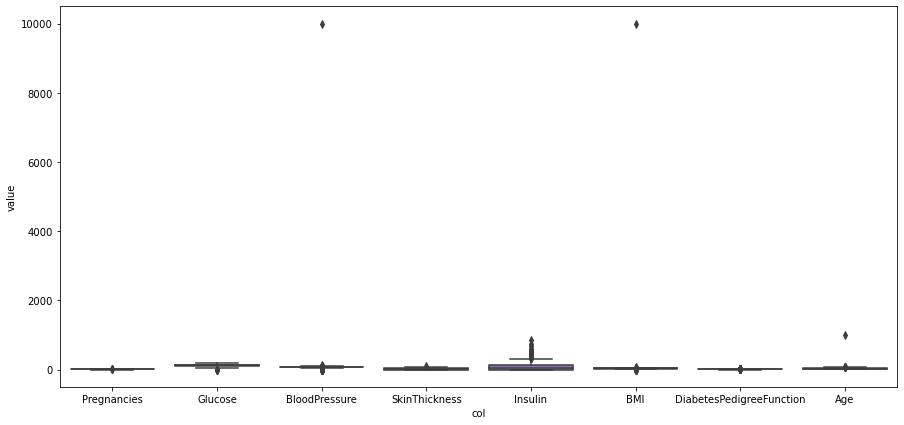

In [11]:
plt.figure(figsize=(15,7))
sns.boxplot(x='col', y='value', data=data1)
plt.xticks(range(8), X.columns)
plt.show()

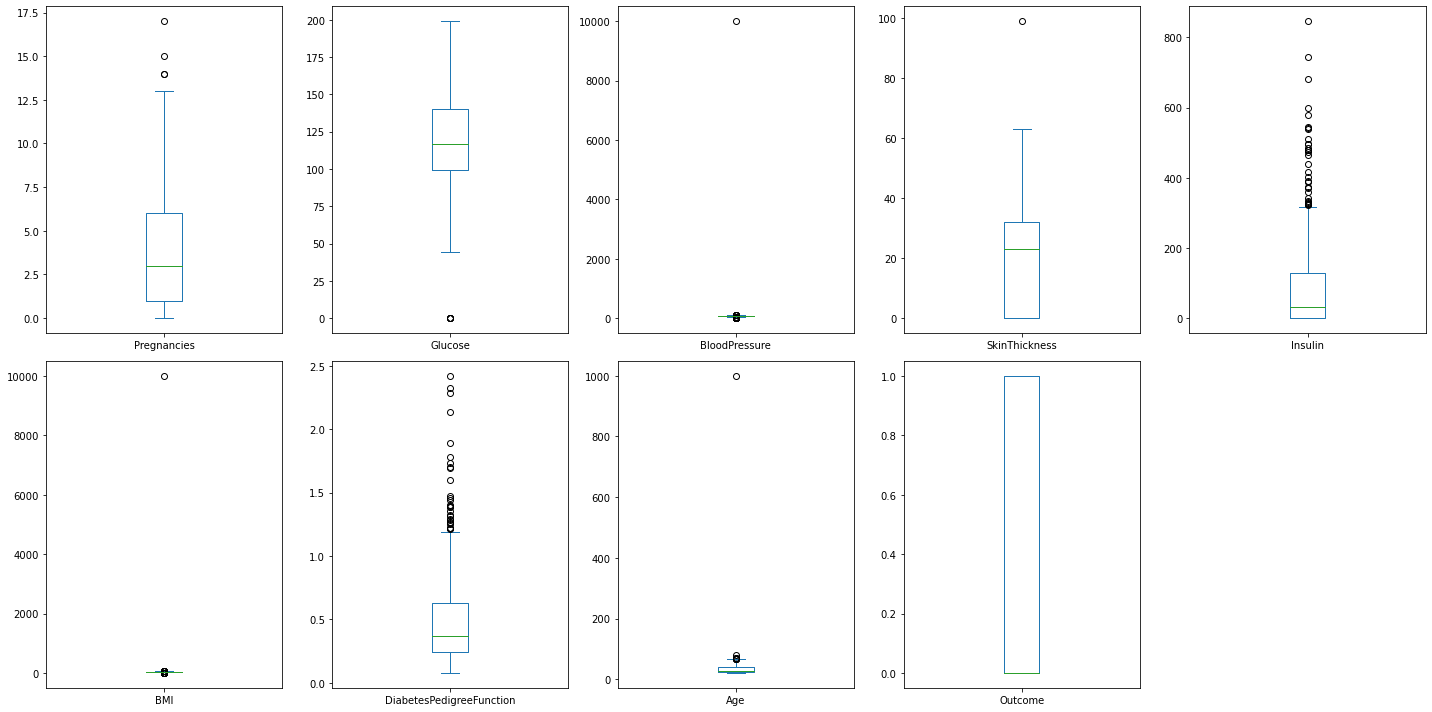

In [12]:
data.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10))
plt.tight_layout()
plt.show()

- 나머지 이상치들은 연속적으로 이어져있어 실제로 이상치를 가진 사람이 있을수도 있으므로 현업의 의견이 필요할것으로 판단됨
- BloodPressure와 Glucose 컬럼은 0이 존재하지 않아야된다고 판단되어 중앙값으로 이상치를 대체하였다.
- Pregnancies : 임신 횟수가 10 이상인 행 삭제
- Age : 100세 이상->중앙값으로 대체(?)

In [17]:
out_index=data[data['BloodPressure']==0].index
data.loc[out_index, 'BloodPressure']=data['BloodPressure'].median()
out2_index=data[data['Glucose']==0].index
data.loc[out2_index, 'Glucose']=data['Glucose'].median()

In [18]:
out3_index=data[data['Age']>100].index
data.loc[out3_index, 'Age']=data['Age'].median()

In [19]:
data[data['Pregnancies']<10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


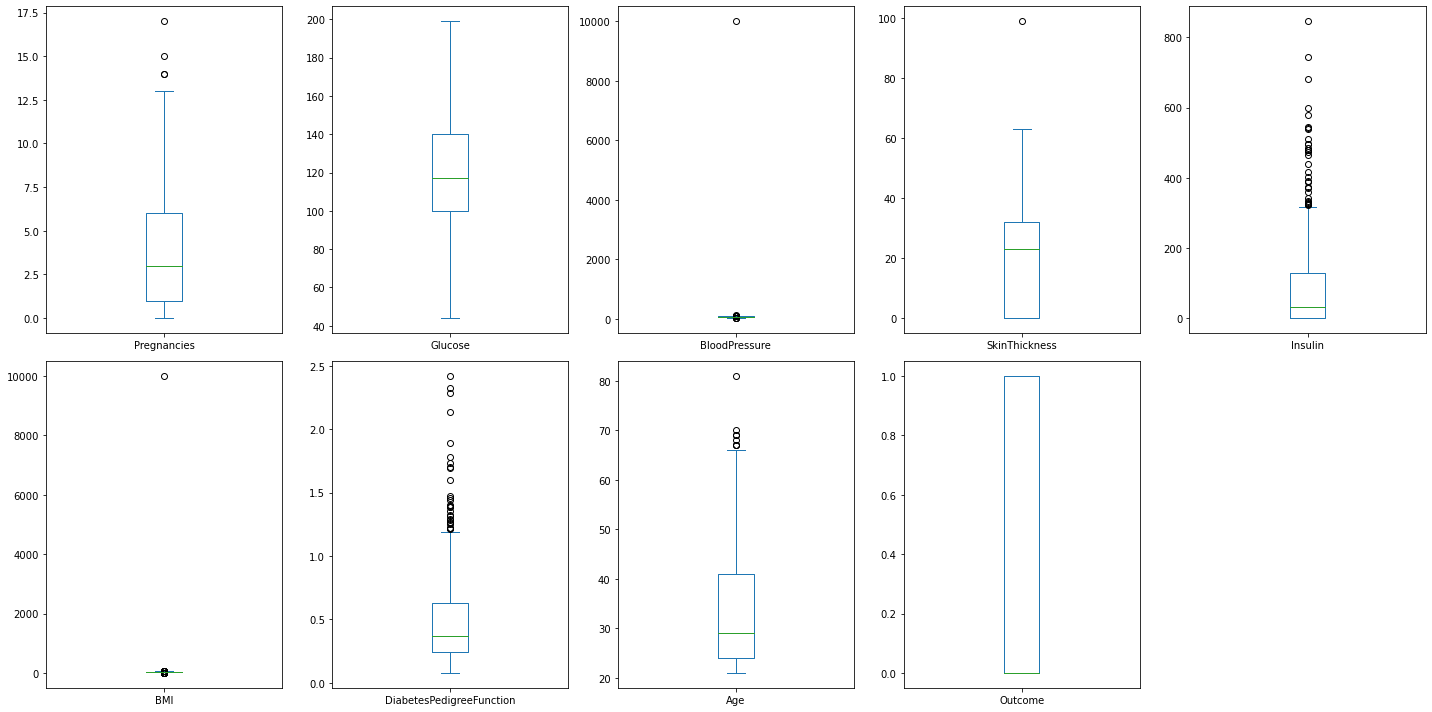

In [20]:
data.plot(kind='box', subplots=True, layout=(2,5), figsize=(20,10))
plt.tight_layout()
plt.show()

In [27]:
#그림다시
X=data.drop(columns=['Outcome'])
data1=pd.melt(X, var_name='col', value_name='value')
data1

,col,value
0,Pregnancies,6.0
1,Pregnancies,1.0
2,Pregnancies,8.0
3,Pregnancies,1.0
4,Pregnancies,0.0
...,...,...
6139,Age,63.0
6140,Age,27.0
6141,Age,30.0
6142,Age,47.0


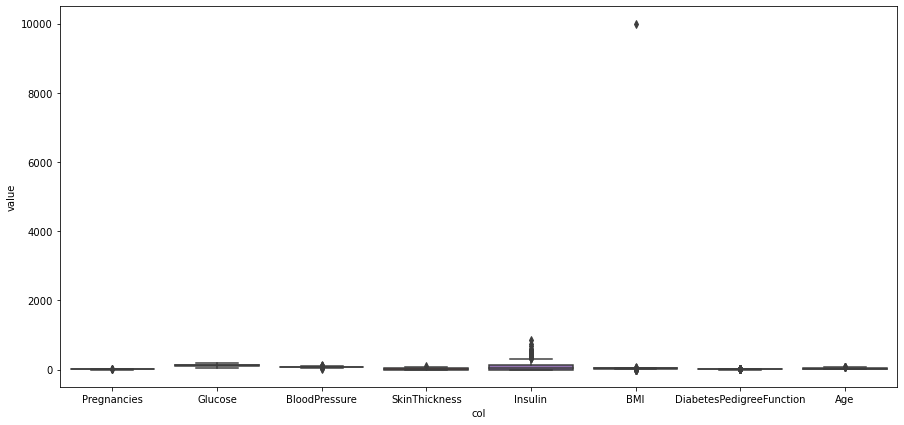

In [28]:
plt.figure(figsize=(15,7))
sns.boxplot(x='col', y='value', data=data1)
plt.xticks(range(8), X.columns)
plt.show()

In [29]:
#BloodPressure에서 중앙값과 멀리 떨어진 이상치 발견->중앙값대체
index=data[data['BloodPressure']>8000].index
data.loc[index, 'BloodPressure']=data['BloodPressure'].median()

In [30]:
X=data.drop(columns=['Outcome'])
data1=pd.melt(X, var_name='col', value_name='value')
data1

,col,value
0,Pregnancies,6.0
1,Pregnancies,1.0
2,Pregnancies,8.0
3,Pregnancies,1.0
4,Pregnancies,0.0
...,...,...
6139,Age,63.0
6140,Age,27.0
6141,Age,30.0
6142,Age,47.0


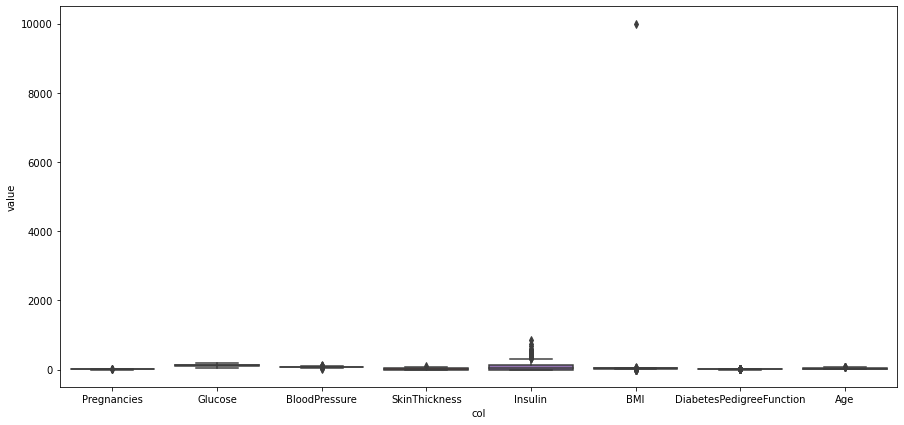

In [32]:
plt.figure(figsize=(15,7))
sns.boxplot(x='col', y='value', data=data1)
plt.xticks(range(8), X.columns)
plt.show()
#BMI에서 중앙값과 멀리 떨어진 이상치 발견->중앙값대체

In [33]:
index=data[data['BMI']>8000].index
data.loc[index, 'BMI']=data['BMI'].median()

In [34]:
X=data.drop(columns=['Outcome'])
data1=pd.melt(X, var_name='col', value_name='value')
data1

,col,value
0,Pregnancies,6.0
1,Pregnancies,1.0
2,Pregnancies,8.0
3,Pregnancies,1.0
4,Pregnancies,0.0
...,...,...
6139,Age,63.0
6140,Age,27.0
6141,Age,30.0
6142,Age,47.0


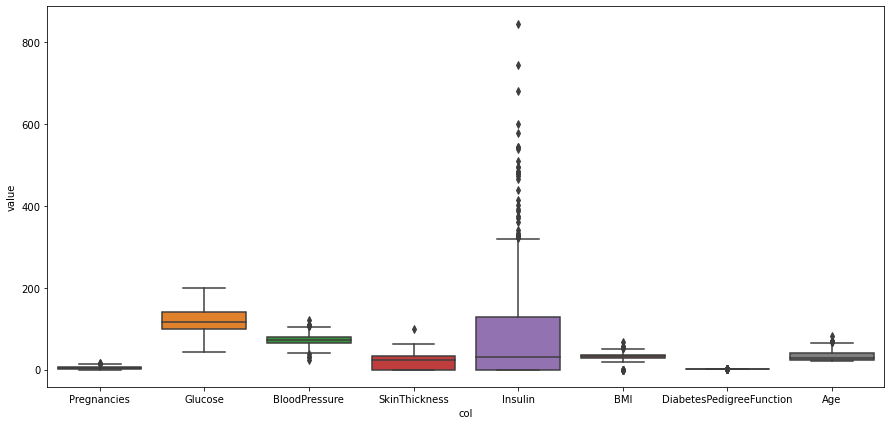

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(x='col', y='value', data=data1)
plt.xticks(range(8), X.columns)
plt.show()

이상치 처리 완료

1-(3) 앞선 두단계에서 얻은 향후 분석시 고려사항

In [36]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.332031,20.536458,79.799479,31.956901,0.471876,33.184896,0.348958
std,3.369578,30.438286,12.002843,15.952218,115.244002,7.821723,0.331329,11.677531,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.525000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


describe()함수를 보게되면, 최솟값과 최댓값의 차이가 많이나는 컬럼이 존재한다. 따라서 선형모델 사용시 scale을 적용할 필요가 있어보임.

2-(1) 오버샘플링 과정 설명하고 결과 작성
- Random Oversampling : 소수 클래스에 속하는 데이터의 관측치를 복사하는 방식으로 데이터를 증식, 데이터를 단순하게 복사하는 방식이므로 기존의 데이터와 동일한 복제 데이터를 생성, 소수 클래스에 과적합이 발생할 가능성이 있다는 단점이 있지만 사용법이 간단하다는 장점
- SMOTE : 적은 데이터세트에 있는 개별 데이터들의 k-최근접 이웃을 찾아, 해당 데이터와 k개 이웃들의 차이를 일정한 값으로 만들어 기존 데이터와 약간의 차이를 지닌 새로운 데이터를 생성하는 방식, SMOTE는 Resampling방식보다 처리 속도가 느리다는 단점이 있지만 과적합 문제를 예방할 수 있음.

In [37]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [38]:
from imblearn.over_sampling import SMOTE
X=data.drop(['Outcome'], axis=1)
y=data[['Outcome']]

sm=SMOTE()
X_sm, y_sm=sm.fit_resample(X, y)
print(y.value_counts())
print(y_sm.value_counts())

Outcome
0          500
1          268
dtype: int64
Outcome
0          500
1          500
dtype: int64


2-(2) 언더샘플링 과정 설명하고 결과작성
- 언더샘플링은 다수 클래스를 감소시켜 소수 클래스 개수에 맞추는 방식으로, 대표적으로 random으로 다수의 클래스의 데이터를 선택하여 삭제하는 RandomUnderSampler, 서로 다른 클래스가 있을 때 서로 다른 클래스에 가장 가까운 데이터들이 토멕 링크로 묶여서 토멕 링크 중 다수 클래스의 데이터를 제거하는 토멕링크 방식이 있다.

In [40]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler()
X_under, y_under=rus.fit_resample(X, y)

print(y.value_counts())
print(y_under.value_counts())

Outcome
0          500
1          268
dtype: int64
Outcome
0          268
1          268
dtype: int64


2-(3) 둘중 하나 선택하고 이유 설명
데이터 수가 많지 않기 때문에 Undersampling을 선태갛게 되면 전체 데이터가 더 적어지기 때문에 과적합이 일어날 위험이 더 크므로 oversampling을 선택하였다.

3-1 최소 3개 이상 알고리즘 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 꼭 구현(총 2개 이상)\
3-2 모델 비교하고 결과 설명\
3-3 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성